# Fourier Analysis

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
import pandas as pd

In [13]:
t = np.linspace(0,1,80)

Text(0,0.5,'Value')

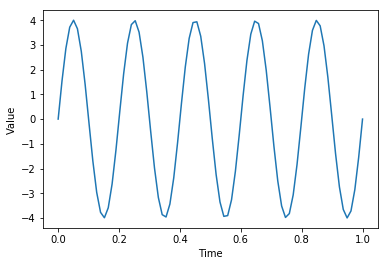

In [14]:
x = 4*np.sin(2*np.pi*5*t)
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Value')

## Fast Fourier Transform

The Fast Fourier Transform (FFT) is an efficient algorithm for calculating the Discrete Fourier Transform (DFT) and is the de facto standard to calculate a Fourier Transform. It is present in almost any scientific computing libraries and packages, in every programming language.

Nowadays the Fourier transform is an indispensable mathematical tool used in almost every aspect of our daily lives. In the next section we will have a look at how we can use the FFT and other Stochastic Signal analysis techniques to classify time-series and signals.

 

In [15]:
x_freqdom = fft(x)

c:\users\hp\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

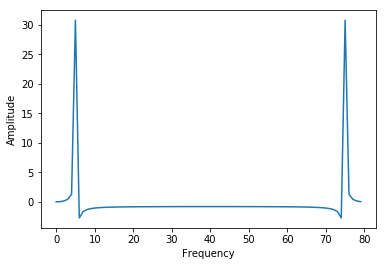

In [16]:
plt.plot(x_freqdom)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

In [17]:
x_inv = ifft(x_freqdom)

c:\users\hp\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


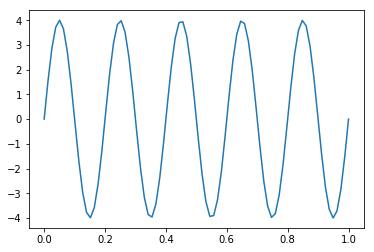

In [18]:
plt.plot(t,x_inv)

In [19]:
print('Reconstruction error: ', sum((x-x_inv)**2))

Reconstruction error:  (4.369007164672983e-29+1.6364559502656486e-29j)


### Example: Forecasting retail sales

Let's see what how we can use the techniques before for forecasting.

In [20]:
df = pd.read_csv("./data/retail_sales.csv")
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


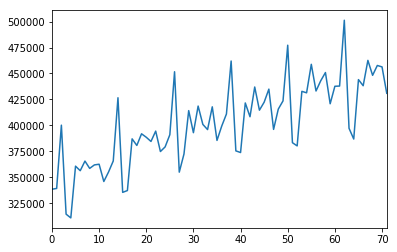

In [21]:
df['sales'].plot()

In [22]:
x = df['sales']
n = x.size # size of the series

t = np.arange(0, n)
p = np.polyfit(t,x,1)
x_notrend = x-p[0]*t


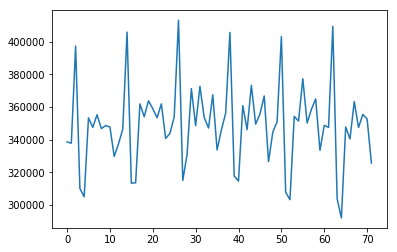

In [23]:
plt.plot(x_notrend)

c:\users\hp\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

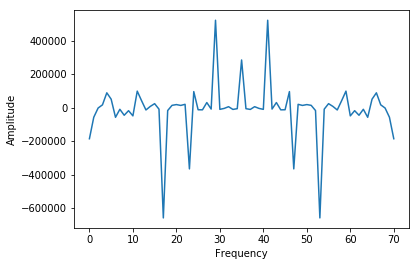

In [24]:
x_freqdom = fft(x_notrend)
plt.plot(x_freqdom[1:])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

In [28]:
x_freqdom

array([ 2.51378916e+07+0.00000000e+00j, -1.85989860e+05-3.37463437e+04j,
       -5.76444735e+04+7.02668468e+04j, -2.57702994e+03-1.76108433e+04j,
        1.63638344e+04-5.18287427e+04j,  8.82363717e+04+3.45037042e+03j,
        5.02902073e+04+2.04970994e+05j, -5.79942096e+04+7.11366351e+04j,
       -1.01339737e+04-6.89549840e+02j, -4.57933775e+04+3.58733630e+04j,
       -1.84499961e+04+1.20109177e+04j, -4.94245745e+04-4.17782535e+04j,
        9.83482171e+04-5.87908650e+05j,  4.08361794e+04-1.45479481e+04j,
       -1.41423318e+04+2.13532637e+04j,  7.09423161e+03+2.90366622e+02j,
        2.34931523e+04+3.18476800e+03j, -9.33307422e+03+3.34622701e+04j,
       -6.58847783e+05-2.97766217e+05j, -1.75656097e+04-3.39296079e+04j,
        1.34267991e+04+2.86640993e+03j,  1.79706482e+04-1.78293799e+04j,
        1.29682088e+04+2.11968771e+04j,  1.95133935e+04+2.47418364e+04j,
       -3.66055783e+05+3.11926637e+05j,  9.55566695e+04+7.04885189e+04j,
       -1.28933803e+04-4.16198483e+04j, -1.33781884

In [29]:
np.absolute(x_freqdom[0]) # Amplitude on frequency domain

25137891.589041077

In [31]:
np.angle(x_freqdom[0]) # Phase angle

0.0

In [32]:
fftfreq(x.size)

array([ 0.        ,  0.01388889,  0.02777778,  0.04166667,  0.05555556,
        0.06944444,  0.08333333,  0.09722222,  0.11111111,  0.125     ,
        0.13888889,  0.15277778,  0.16666667,  0.18055556,  0.19444444,
        0.20833333,  0.22222222,  0.23611111,  0.25      ,  0.26388889,
        0.27777778,  0.29166667,  0.30555556,  0.31944444,  0.33333333,
        0.34722222,  0.36111111,  0.375     ,  0.38888889,  0.40277778,
        0.41666667,  0.43055556,  0.44444444,  0.45833333,  0.47222222,
        0.48611111, -0.5       , -0.48611111, -0.47222222, -0.45833333,
       -0.44444444, -0.43055556, -0.41666667, -0.40277778, -0.38888889,
       -0.375     , -0.36111111, -0.34722222, -0.33333333, -0.31944444,
       -0.30555556, -0.29166667, -0.27777778, -0.26388889, -0.25      ,
       -0.23611111, -0.22222222, -0.20833333, -0.19444444, -0.18055556,
       -0.16666667, -0.15277778, -0.13888889, -0.125     , -0.11111111,
       -0.09722222, -0.08333333, -0.06944444, -0.05555556, -0.04

In [25]:
def fourierExtrapolation(x, n_predict, n_harm = 10):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft(x_notrend)  # detrended x in frequency domain
    f = fftfreq(n)              # frequencies
    idxs = list(range(n))
    # sort indexes by frequency, lower -> higher
    idxs.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in idxs[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

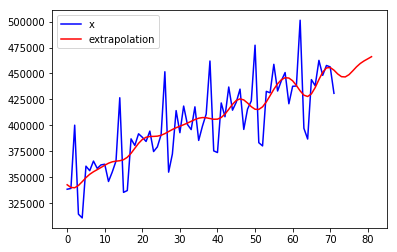

In [27]:
n_predict = 10
extrapolation = fourierExtrapolation(x, n_predict, n_harm=10)
plt.plot(np.arange(0, x.size), x, 'b', label = 'x')
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()

# Your turn!
Can you apply the same method to `SP500`?